In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

#drop one duplicate record with same city name, same ride_ids but different # of drivers


#merge
combined_data = pd.merge(city_data, ride_data, on = 'city')

combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
#Average Fare Per City
average_fare = combined_data.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})

#Total Number of Rides Per City
total_rides = combined_data.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})

#Total Drivers
total_drivers = combined_data[["city", "driver_count"]].drop_duplicates("city")

#Define City type
city_type = combined_data[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

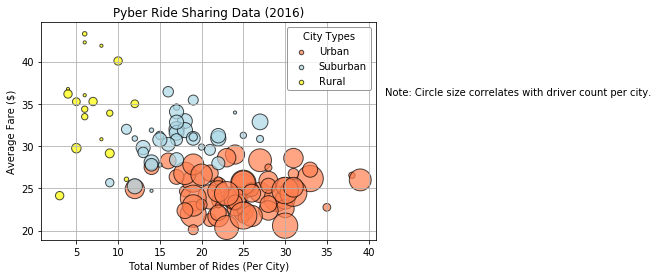

In [12]:
#Obtain the x and y coordinates for each of the three city types
#group cities by type
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Build the scatter plots for each city types
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='coral', s=urban_group['driver_count']*10, label = 'Urban', 
                       alpha = 0.7, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightblue',s=suburban_group['driver_count']*10, label = 'Suburban', 
                          alpha = 0.7, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='yellow', s=rural_group['driver_count']*10, label = 'Rural', 
                       alpha = 0.7, edgecolor = "black", linewidths = 1, ax=ax1)

#Incorporate the other graph properties
#add chart descriptions 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(title = "City Types", frameon = True, edgecolor = 'gray')
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
plt.text(42,36,"Note: Circle size correlates with driver count per city.")

#add grid to chart
plt.grid(True)

plt.savefig("PyberScatterPlot2.png")

plt.show()





## Total Fares by City Type

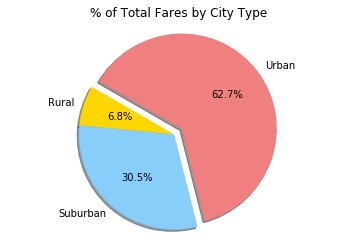

In [13]:
#group by type of city and fare amount
city_fare_pie = combined_data.groupby(["type"])["fare"].sum()
city_fare_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]


#explode urban data set
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.savefig("FaresPie.png")
plt.show()



## Total Rides by City Type

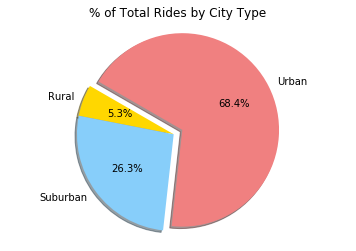

In [14]:
city_rides_pie = combined_data.groupby(["type"])["ride_id"].count()
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]


explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.savefig("RidesPie.png")
plt.show()



## Total Drivers by City Type

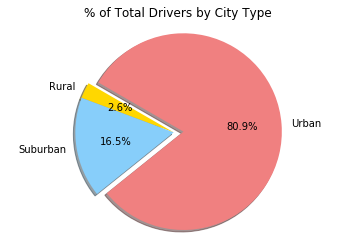

In [15]:
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]


explode = (0,0,0.1)

#Create the pie chart.
plt.pie(drivers_sum, labels = drivers_sum.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 150)

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.savefig("DriversPie.png")
plt.show()

